<a href="https://colab.research.google.com/github/Divyesh-Kanagavel/deep_learning--keras/blob/master/DLP_chap3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import imdb
import matplotlib.pyplot as plt

In [4]:
(train_data,training_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1

  return results


In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(training_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [10]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(partial_x_train,partial_y_train,batch_size = 512, epochs = 20, validation_data = (x_val, y_val))


Epoch 1/20
30/30 [==============================] - 15s 53ms/step - loss: 0.5843 - acc: 0.7197 - val_loss: 0.3830 - val_acc: 0.8686
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3207 - acc: 0.8991 - val_loss: 0.3147 - val_acc: 0.8810
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2259 - acc: 0.9296 - val_loss: 0.2923 - val_acc: 0.8832
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1709 - acc: 0.9476 - val_loss: 0.2864 - val_acc: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1411 - acc: 0.9571 - val_loss: 0.2813 - val_acc: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1152 - acc: 0.9654 - val_loss: 0.2928 - val_acc: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0884 - acc: 0.9765 - val_loss: 0.3447 - val_acc: 0.8756
Epoch 8/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0790 - 

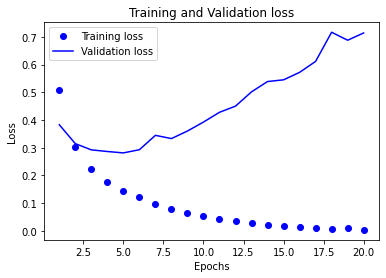

In [11]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1,len(acc)+1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


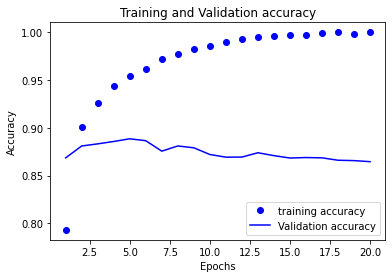

In [12]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label = 'training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop',loss = 'mse', metrics = ['accuracy'])
model.fit(x_train,y_train, epochs = 4,batch_size=512)
results = model.evaluate(x_test,y_test)


Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.1784 - accuracy: 0.7307
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.0755 - accuracy: 0.9050
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.0535 - accuracy: 0.9348
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0958 - accuracy: 0.8737


In [14]:
results


[0.09581369161605835, 0.8736799955368042]